In [17]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import Ridge, Lasso # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.metrics import mean_squared_error # Allows us to use the MSE function without calling in sklearn each time
 # We will be importing a csv file I have provided for one section.
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import mean_squared_error # Allows us to use the MSE function without calling in sklearn each time


In [18]:
import time
start = time.time()
housingData = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\Data Science\\Project\\autoscout24_germany_dataset.csv")
# This file has all the data elements constructed already, so we can just put the entire thing into the 'data=' 
df = pd.DataFrame(data= housingData)

# show the data
display(df) 
end = time.time()
print('Execution time:', (end-start), 'seconds')

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


Execution time: 0.06296133995056152 seconds


In [19]:
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [20]:
df = df.dropna()
print(df)


       mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46400       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46401       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46402       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46403       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46404       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   

       price     hp  year  

In [21]:
X = df.drop(['gear', 'make', 'model', 'offerType', 'fuel'], axis = 1)
y = df['gear']
from sklearn import preprocessing

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["make","model","fuel","gear", "offerType"]] = enc.fit_transform(df[["make","model","fuel","gear", "offerType"]])

In [23]:
X = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
y = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['model','gear'],axis=1)
y=df['gear']

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['mileage', 'make', 'fuel', 'offerType', 'price', 'hp', 'year'], dtype='object')


In [25]:
features=list(X.columns[rfe.support_])

In [26]:
x = X[features]
y = df.gear
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

#Linear Regresson

In [27]:
import time
start = time.time()
from sklearn import linear_model
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
A =lreg.score(x_test,y_test)
print(A)
end = time.time()
print('Execution time:', (end-start), 'seconds')

0.4205099943944124
Execution time: 0.014997482299804688 seconds


In [28]:
import time
start = time.time()
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
B=dt_regressor.score(x_test,y_test)
print(B)
end = time.time()
print('Execution time:', (end-start), 'seconds')

0.2178619073966387
Execution time: 0.16406679153442383 seconds


In [29]:
import time
start = time.time()
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)

from sklearn.metrics import r2_score
r2_score=r2_score(y_test,Rf_test_pred)
print(r2_score)
end = time.time()
print('Execution time:', (end-start), 'seconds')

0.5502187357198658
Execution time: 0.27822160720825195 seconds


#Decision Tree Classification

Accuracy: 0.8383
Confusion matrix:  [[2.53863518e-01 9.37662789e-02 0.00000000e+00]
 [6.69387046e-02 5.84389651e-01 0.00000000e+00]
 [4.34103143e-04 6.07744400e-04 0.00000000e+00]]
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      4004
         1.0       0.86      0.90      0.88      7502
         2.0       0.00      0.00      0.00        12

    accuracy                           0.84     11518
   macro avg       0.55      0.54      0.55     11518
weighted avg       0.84      0.84      0.84     11518

Execution time: 0.1700429916381836 seconds


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


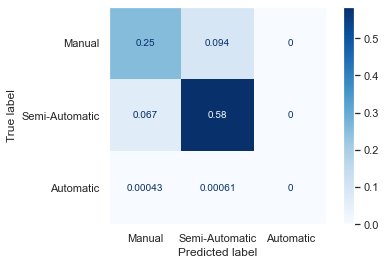

In [30]:
import time
start = time.time()
from sklearn.tree import DecisionTreeClassifier
obj = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9,random_state=40)

# Train the model using the training sets
obj.fit(x_train, y_train)

# Make predictions using the testing set
y_new_pred = obj.predict(x_test)

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_new_pred)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_new_pred, normalize='all')
print('Confusion matrix: ', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Manual', 'Semi-Automatic', 'Automatic']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_new_pred))
end = time.time()
print('Execution time:', (end-start), 'seconds')

#Random Forest Classification

In [31]:
import time
start = time.time()
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Test the classifier on the test data
accuracy = clf.score(x_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
end = time.time()
print('Execution time:', (end-start), 'seconds')

Test accuracy: 0.83
Execution time: 1.1350092887878418 seconds


#Logistic Regression

In [32]:
import time
start = time.time()
from sklearn.linear_model import LogisticRegression
# Create a logistic regression classifier
clf = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Test the classifier on the test data
accuracy = clf.score(x_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')
end = time.time()
print('Execution time:', (end-start), 'seconds')

Test accuracy: 0.81
Execution time: 2.3575406074523926 seconds
